MACHINE LEARNING CAMP 2022 
MID TERM PROJECT 


In [52]:
## LIBRARIES

import pandas as pd
import pickle
import statsmodels.api as sm
import math
from matplotlib import *
import sys
from pylab import *
import pylab as pl
from matplotlib import figure
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.feature_extraction import DictVectorizer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
import numpy as np
from scipy.stats import boxcox 
import pyreadr 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale 
import seaborn as sns 
import matplotlib as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import plotly.express as px
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

In [53]:
## Import datasets

por = pd.read_csv("/Users/alexandervalverde/Library/Mobile Documents/com~apple~CloudDocs/ML_Zoom_Camp/Dataset/student-por.csv")
por
df = pd.DataFrame(por)
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [54]:
## See if there nulls

# Count number of zeros in all columns of Dataframe
for column_name in por.columns:
    column = por[column_name]
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)


Count of zeros in column  school  is :  0
Count of zeros in column  sex  is :  0
Count of zeros in column  age  is :  0
Count of zeros in column  address  is :  0
Count of zeros in column  famsize  is :  0
Count of zeros in column  Pstatus  is :  0
Count of zeros in column  Medu  is :  6
Count of zeros in column  Fedu  is :  7
Count of zeros in column  Mjob  is :  0
Count of zeros in column  Fjob  is :  0
Count of zeros in column  reason  is :  0
Count of zeros in column  guardian  is :  0
Count of zeros in column  traveltime  is :  0
Count of zeros in column  studytime  is :  0
Count of zeros in column  failures  is :  549
Count of zeros in column  schoolsup  is :  0
Count of zeros in column  famsup  is :  0
Count of zeros in column  paid  is :  0
Count of zeros in column  activities  is :  0
Count of zeros in column  nursery  is :  0
Count of zeros in column  higher  is :  0
Count of zeros in column  internet  is :  0
Count of zeros in column  romantic  is :  0
Count of zeros in colu

In [55]:
## Check null variables

nulls = por.isnull().sum(axis = 0)
nulls
## Check for categorical variables
def categorical(dataframe):  
    global df_cat
    categorical1 = dataframe.select_dtypes(exclude=['int64'])
    df_cat = categorical1
    return df_cat
categorical(df)
## Check for numerical variables
def numerical(dataframe): 
    global df_num
    numerical1 = dataframe.select_dtypes(exclude=['object'])
    df_num = numerical1
    return df_num
numerical(df)


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,4,0,11,11
1,17,1,1,1,2,0,5,3,3,1,1,3,2,9,11,11
2,15,1,1,1,2,0,4,3,2,2,3,3,6,12,13,12
3,15,4,2,1,3,0,3,2,2,1,1,5,0,14,14,14
4,16,3,3,1,2,0,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,2,3,1,3,1,5,4,2,1,2,5,4,10,11,10
645,18,3,1,1,2,0,4,3,4,1,1,1,4,15,15,16
646,18,1,1,2,2,0,1,1,1,1,1,5,6,11,12,9
647,17,3,1,2,1,0,2,4,5,3,4,2,6,10,10,10


In [56]:
## Correlacion 
matrix = df_num.corr()
matrix.style.background_gradient(cmap='coolwarm')

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.107832,-0.121050,0.034490,-0.008415,0.319968,-0.020559,-0.004910,0.112805,0.134768,0.086357,-0.008750,0.149998,-0.174322,-0.107119,-0.106505
Medu,-0.107832,1.000000,0.647477,-0.265079,0.097006,-0.172210,0.024421,-0.019686,0.009536,-0.007018,-0.019766,0.004614,-0.008577,0.260472,0.264035,0.240151
Fedu,-0.121050,0.647477,1.000000,-0.208288,0.050400,-0.165915,0.020256,0.006841,0.027690,0.000061,0.038445,0.044910,0.029859,0.217501,0.225139,0.211800
traveltime,0.034490,-0.265079,-0.208288,1.000000,-0.063154,0.097730,-0.009521,0.000937,0.057454,0.092824,0.057007,-0.048261,-0.008149,-0.154120,-0.154489,-0.127173
studytime,-0.008415,0.097006,0.050400,-0.063154,1.000000,-0.147441,-0.004127,-0.068829,-0.075442,-0.137585,-0.214925,-0.056433,-0.118389,0.260875,0.240498,0.249789
failures,0.319968,-0.172210,-0.165915,0.097730,-0.147441,1.000000,-0.062645,0.108995,0.045078,0.105949,0.082266,0.035588,0.122779,-0.384210,-0.385782,-0.393316
famrel,-0.020559,0.024421,0.020256,-0.009521,-0.004127,-0.062645,1.000000,0.129216,0.089707,-0.075767,-0.093511,0.109559,-0.089534,0.048795,0.089588,0.063361
freetime,-0.004910,-0.019686,0.006841,0.000937,-0.068829,0.108995,0.129216,1.000000,0.346352,0.109904,0.120244,0.084526,-0.018716,-0.094497,-0.106678,-0.122705
goout,0.112805,0.009536,0.027690,0.057454,-0.075442,0.045078,0.089707,0.346352,1.000000,0.245126,0.388680,-0.015741,0.085374,-0.074053,-0.079469,-0.087641
Dalc,0.134768,-0.007018,0.000061,0.092824,-0.137585,0.105949,-0.075767,0.109904,0.245126,1.000000,0.616561,0.059067,0.172952,-0.195171,-0.189480,-0.204719


In [63]:
## Drop numerical variables with high correlation (correlation over 0.60)
global df_num
def correlation(data):
    df_num = data.drop(columns=['Medu','G1','G2','Dalc'])
    return df_num
correlation(df_num)

,age,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Walc,health,absences,G3
0,18,4,2,2,0,4,3,4,1,3,4,11
1,17,1,1,2,0,5,3,3,1,3,2,11
2,15,1,1,2,0,4,3,2,3,3,6,12
3,15,2,1,3,0,3,2,2,1,5,0,14
4,16,3,1,2,0,4,3,2,2,5,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,3,1,3,1,5,4,2,2,5,4,10
645,18,1,1,2,0,4,3,4,1,1,4,16
646,18,1,2,2,0,1,1,1,1,5,6,9
647,17,1,2,1,0,2,4,5,4,2,6,10


In [64]:
## Descriptive analysis 

df_num.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [65]:
## Create 2 list from df_num and df_cat

df_cat2 = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic']

df_num2 = ['age', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'health', 'absences','G2']


In [73]:
## CLEAN train data set
##train model
dv = DictVectorizer(sparse=False)

train_dict = df[df_cat2 + df_num2].to_dict(orient='records')
X = dv.fit_transform(train_dict)

## Stablish the dependent variable as y variable
target = 'G3'
Y = df[target].values

## Create a training and test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

REGRESSION MODELS 
1. Linear Regression 
2. Lasso Regression
3. Xgboost 

In [43]:
## Linear Regression Model

lr = LinearRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_pred), r2_score(y_test, y_pred_test)))

MSE_train_lr = mean_squared_error(y_train, y_pred)
MSE_test_lr  =  mean_squared_error(y_test, y_pred_test)
RMSE_train_lr = math.sqrt(MSE_train_lr)
RMSE_test_lr = math.sqrt(MSE_test_lr)

print('RMSE_TRAIN', RMSE_train_lr)
print('RMSE_TEST', RMSE_test_lr)

print('model intercept :', lr.intercept_)
print('model coefficients : ', lr.coef_)

R^2 train: 0.840, test: 0.881
RMSE_TRAIN 1.2708896261819516
RMSE_TEST 1.146968683304894
model intercept : 979293455138.7941
model coefficients :  [-1.32480082e-01 -4.69202013e-03  3.87432103e+11  3.87432103e+11
  3.87432103e+11  3.87432103e+11  3.87432103e+11  9.84219633e-01
 -1.05578096e+11 -1.05578096e+11 -1.05578096e+11 -1.05578096e+11
 -1.05578096e+11 -3.31763092e+10 -3.31763092e+10  1.82653214e-02
 -4.59120415e+10 -4.59120415e+10 -7.53059233e+10 -7.53059233e+10
 -3.95797094e-02 -1.86985299e-01 -6.44389369e-02 -2.94310447e+10
 -2.94310447e+10 -1.10883197e+11 -1.10883197e+11 -7.79119516e-02
  4.60340440e-02  2.12278422e+10  2.12278422e+10  2.12278422e+10
 -5.77161682e-02  2.10583199e+10  2.10583199e+10 -2.93022645e+09
 -2.93022645e+09  3.28207519e+10  3.28207519e+10 -4.01477816e+10
 -4.01477816e+10 -1.29606556e+10 -1.29606556e+10 -1.29606556e+10
 -1.29606556e+10  4.09450137e+10  4.09450137e+10 -6.35572682e+10
 -6.35572682e+10 -9.20896324e+10 -9.20896324e+10 -8.70805311e+11
 -8.70805

In [74]:
## Lasso regression
lar = Lasso(alpha=0.01)
lar.fit(X_train, y_train)

y_pred = lar.predict(X_train)
y_pred_test = lar.predict(X_test)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
print(test_rmse)

print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_pred), r2_score(y_test, y_pred_test)))


1.1202578480226315
R^2 train: 0.839, test: 0.887


/var/folders/zw/mb45ddnn0g98d2p147gt67bm0000gn/T/ipykernel_17152/929538570.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='prediction')
/var/folders/zw/mb45ddnn0g98d2p147gt67bm0000gn/T/ipykernel_17152/929538570.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label

TypeError: 'module' object is not callable

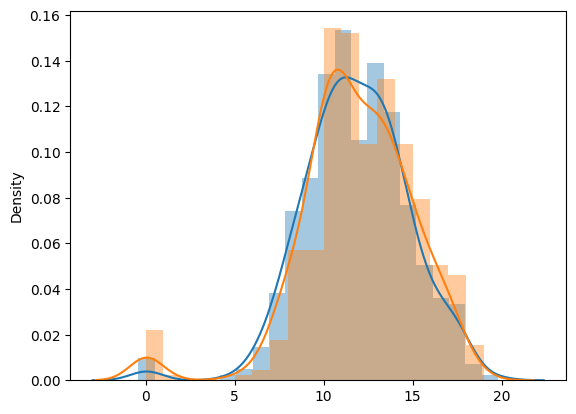

In [78]:
## Plot validation model
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

In [39]:
## XGboost Model 

dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=dv.feature_names_)
dval = xgb.DMatrix(X_test, label=y_test, feature_names=dv.feature_names_)
watchlist = [(dtrain, 'train'), (dval, 'test')]


In [78]:
## XGboost Parameters

xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'nthread': 8,
    'seed': 1
}

In [79]:
## Model
model = xgb.train(xgb_params, dtrain,
                  num_boost_round=300,
                  evals=watchlist, verbose_eval=10)

[0]	train-rmse:8.31914	test-rmse:8.57569
[10]	train-rmse:0.63807	test-rmse:1.25667
[20]	train-rmse:0.35965	test-rmse:1.23830
[30]	train-rmse:0.23506	test-rmse:1.23936
[40]	train-rmse:0.14900	test-rmse:1.24113
[50]	train-rmse:0.09662	test-rmse:1.24703
[60]	train-rmse:0.06795	test-rmse:1.24697
[70]	train-rmse:0.04544	test-rmse:1.24789
[80]	train-rmse:0.03082	test-rmse:1.24826
[90]	train-rmse:0.01627	test-rmse:1.24942
[100]	train-rmse:0.01215	test-rmse:1.25053
[110]	train-rmse:0.00835	test-rmse:1.25083
[120]	train-rmse:0.00565	test-rmse:1.25108
[130]	train-rmse:0.00346	test-rmse:1.25129
[140]	train-rmse:0.00206	test-rmse:1.25137
[150]	train-rmse:0.00137	test-rmse:1.25140
[160]	train-rmse:0.00137	test-rmse:1.25141
[170]	train-rmse:0.00137	test-rmse:1.25141
[180]	train-rmse:0.00137	test-rmse:1.25141
[190]	train-rmse:0.00137	test-rmse:1.25141
[200]	train-rmse:0.00137	test-rmse:1.25141
[210]	train-rmse:0.00137	test-rmse:1.25141
[220]	train-rmse:0.00137	test-rmse:1.25141
[230]	train-rmse:0.001

In [80]:
## Extract important feautures 
scores = model.get_score(importance_type='gain')
scores = sorted(scores.items(), key=lambda x: x[1])
list(reversed(scores))

# Weight
scores = model.get_score(importance_type='weight')
scores = sorted(scores.items(), key=lambda x: x[1])
list(reversed(scores))

[('G2', 657.0),
 ('absences', 488.0),
 ('Fedu', 413.0),
 ('Dalc', 333.0),
 ('age', 309.0),
 ('goout', 276.0),
 ('freetime', 270.0),
 ('health', 268.0),
 ('famrel', 268.0),
 ('studytime', 170.0),
 ('traveltime', 144.0),
 ('activities=no', 141.0),
 ('Mjob=other', 141.0),
 ('Fjob=other', 125.0),
 ('romantic=no', 124.0),
 ('reason=course', 119.0),
 ('sex=F', 110.0),
 ('address=R', 110.0),
 ('famsup=no', 101.0),
 ('famsize=GT3', 92.0),
 ('school=GP', 88.0),
 ('nursery=no', 83.0),
 ('Mjob=at_home', 79.0),
 ('internet=no', 78.0),
 ('reason=home', 75.0),
 ('Mjob=services', 72.0),
 ('guardian=father', 68.0),
 ('Fjob=services', 67.0),
 ('guardian=mother', 63.0),
 ('failures', 63.0),
 ('Pstatus=A', 56.0),
 ('Mjob=health', 49.0),
 ('Fjob=at_home', 49.0),
 ('schoolsup=no', 47.0),
 ('paid=no', 46.0),
 ('reason=reputation', 42.0),
 ('Mjob=teacher', 39.0),
 ('reason=other', 36.0),
 ('higher=no', 26.0),
 ('Fjob=teacher', 19.0),
 ('Fjob=health', 16.0),
 ('guardian=other', 13.0)]

In [81]:
names = [n for (n, s) in scores]
scores = [s for (n, s) in scores]

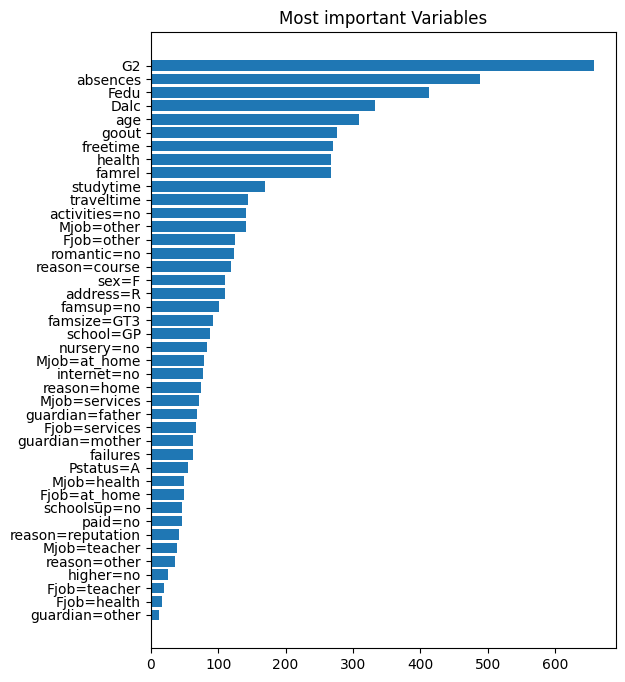

In [82]:
## Plot most important variables in Xgboost
pl.figure( figsize =(6,8) )

pl.barh(np.arange(len(scores)), scores)
pl.yticks(np.arange(len(names)), names)
pl.title("Most important Variables")
pl.show()

In [83]:
## Save Model 

## Save model
with open('/Users/alexandervalverde/Documents/ML_Zoom_Camp/lar.bin','wb') as f_out:
 pickle.dump((dv,lar), f_out)